Cleaned Matches Data Head:
   match_id        date       venue        team1             team2  \
0         1  2024-06-01      Dallas          USA            Canada   
1         2  2024-06-02  Providence  West Indies  Papua New Guinea   
2         3  2024-06-03  Georgetown      Namibia              Oman   
3         4  2024-06-03    New York    Sri Lanka      South Africa   
4         5  2024-06-04      Dallas  Afghanistan            Uganda   

    toss_winner toss_decision        winner  win_by_runs  win_by_wickets  \
0           USA         field           USA            0               7   
1   West Indies         field   West Indies            0               5   
2          Oman         field       Namibia            0               0   
3  South Africa         field  South Africa            0               6   
4   Afghanistan         field   Afghanistan          125               0   

     player_of_match  first_innings_score  second_innings_score  \
0        Aaron Jones        

C:\Users\shres\AppData\Local\Temp\ipykernel_43148\3844402528.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='venue', data=matches_df, order=matches_df['venue'].value_counts().index, palette='viridis')


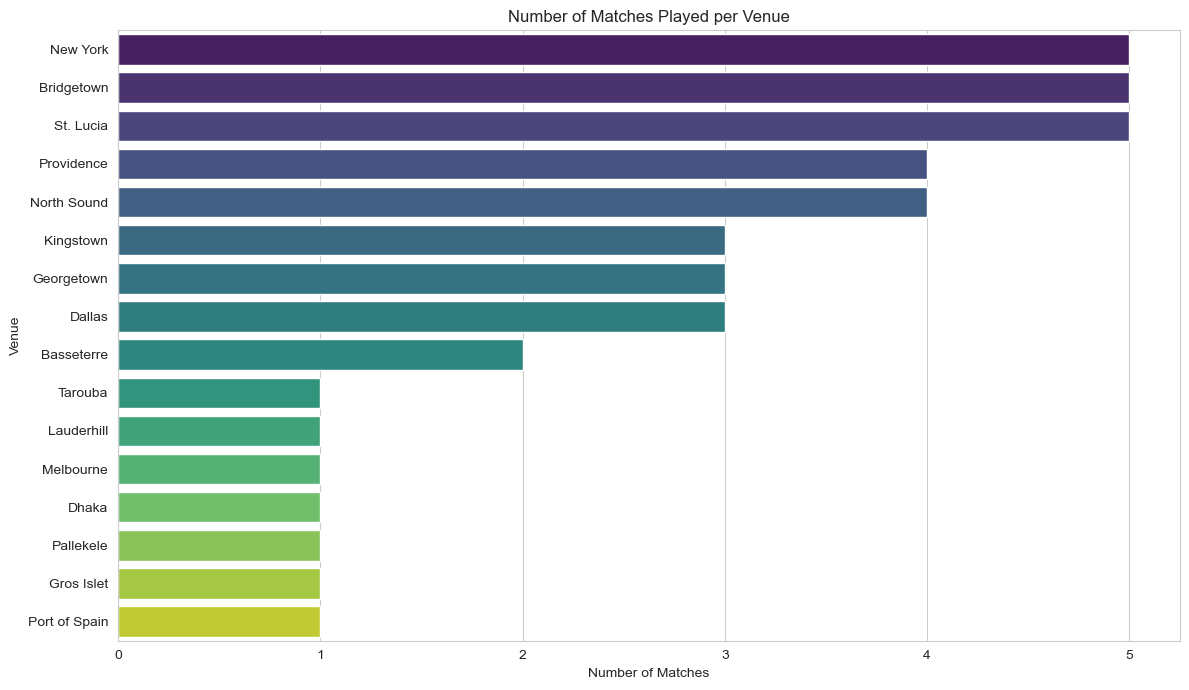


Percentage of matches won by the team that won the toss: 56.10%

Toss Decision vs. Match Outcome (Counts):
toss_winner_won_match  False  True 
toss_decision                      
bat                        1      7
field                     17     16


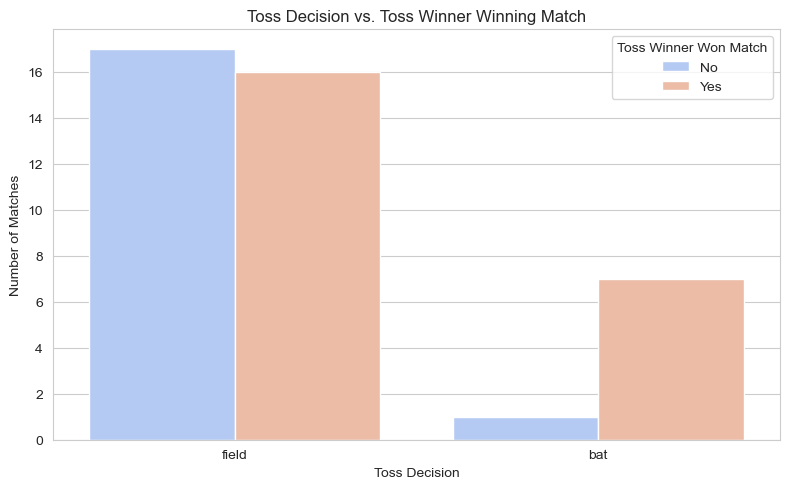


Average First Innings Score: 143.34
Average Second Innings Score: 126.59


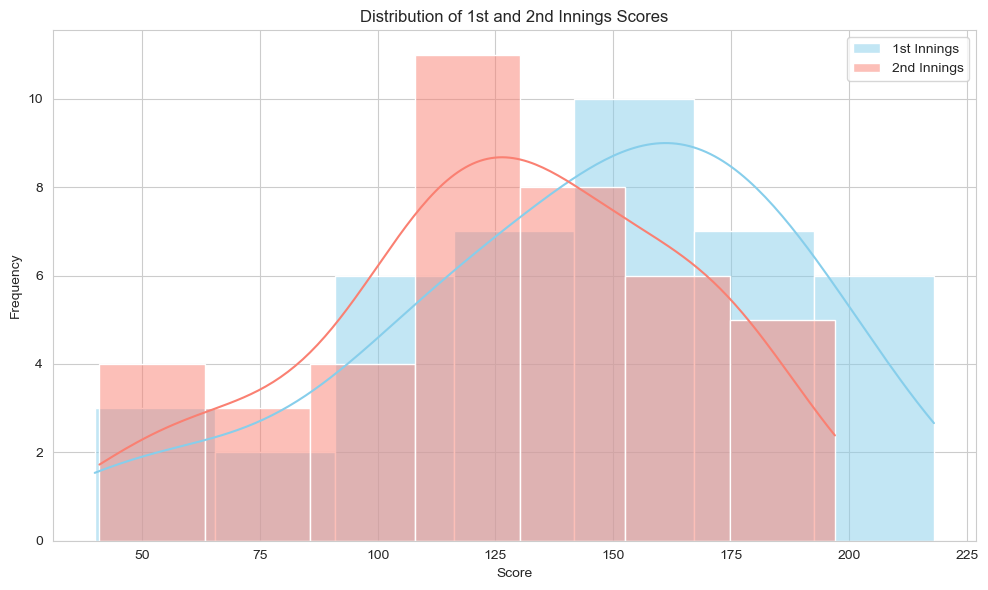

C:\Users\shres\AppData\Local\Temp\ipykernel_43148\3844402528.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='venue', y='first_innings_score', data=matches_df, palette='pastel')


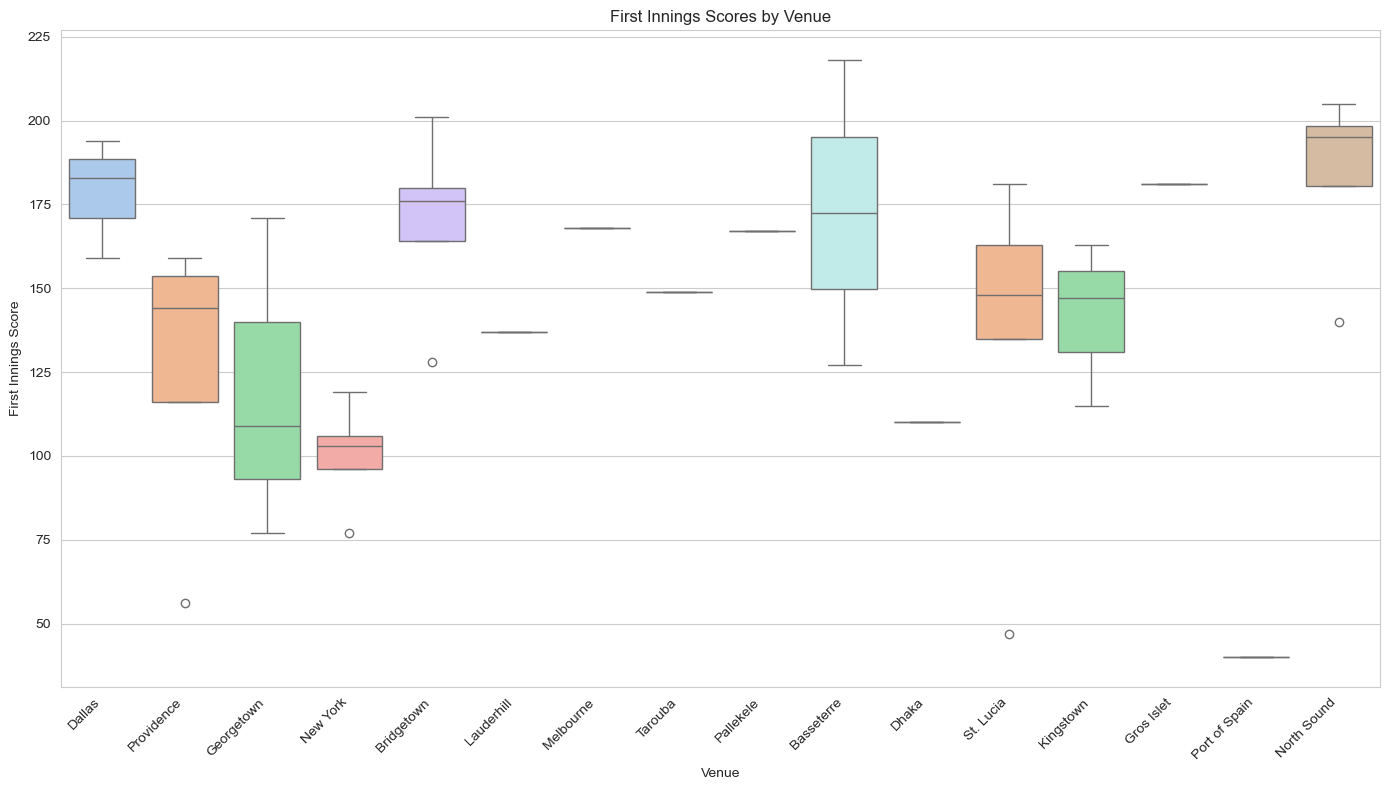


--- Top 10 Batsmen by Total Runs ---
player
Nicholas Pooran     250
Rohit Sharma        248
Quinton de Kock     235
Aaron Jones         222
Phil Salt           210
Travis Head         205
Andries Gous        192
Heinrich Klaasen    190
Rishabh Pant        185
Jos Buttler         180
Name: runs, dtype: int64


C:\Users\shres\AppData\Local\Temp\ipykernel_43148\3844402528.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen_runs.values, y=top_batsmen_runs.index, palette='crest')


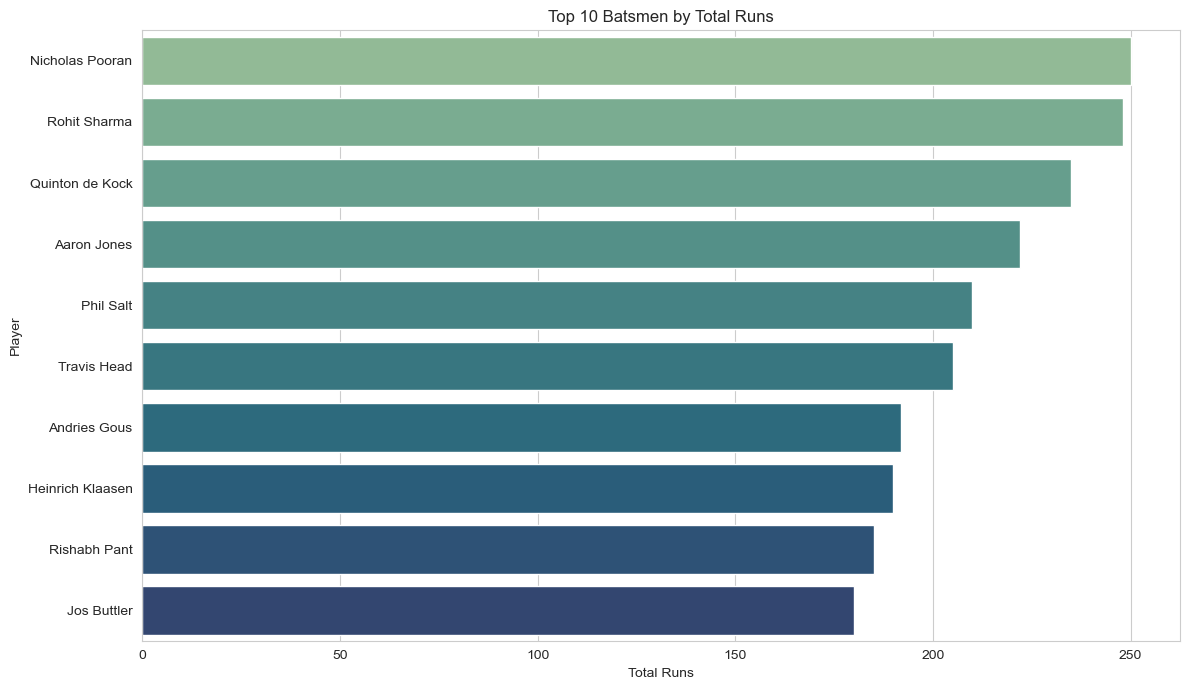


--- Top 10 Bowlers by Total Wickets ---
player
Tabraiz Shamsi      17
Fazalhaq Farooqi    16
Jasprit Bumrah      15
Anrich Nortje       14
Adam Zampa          13
Arshdeep Singh      13
Hardik Pandya       12
Adil Rashid         11
Kagiso Rabada       11
Kuldeep Yadav       10
Name: wickets, dtype: int64


C:\Users\shres\AppData\Local\Temp\ipykernel_43148\3844402528.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers_wickets.values, y=top_bowlers_wickets.index, palette='mako')


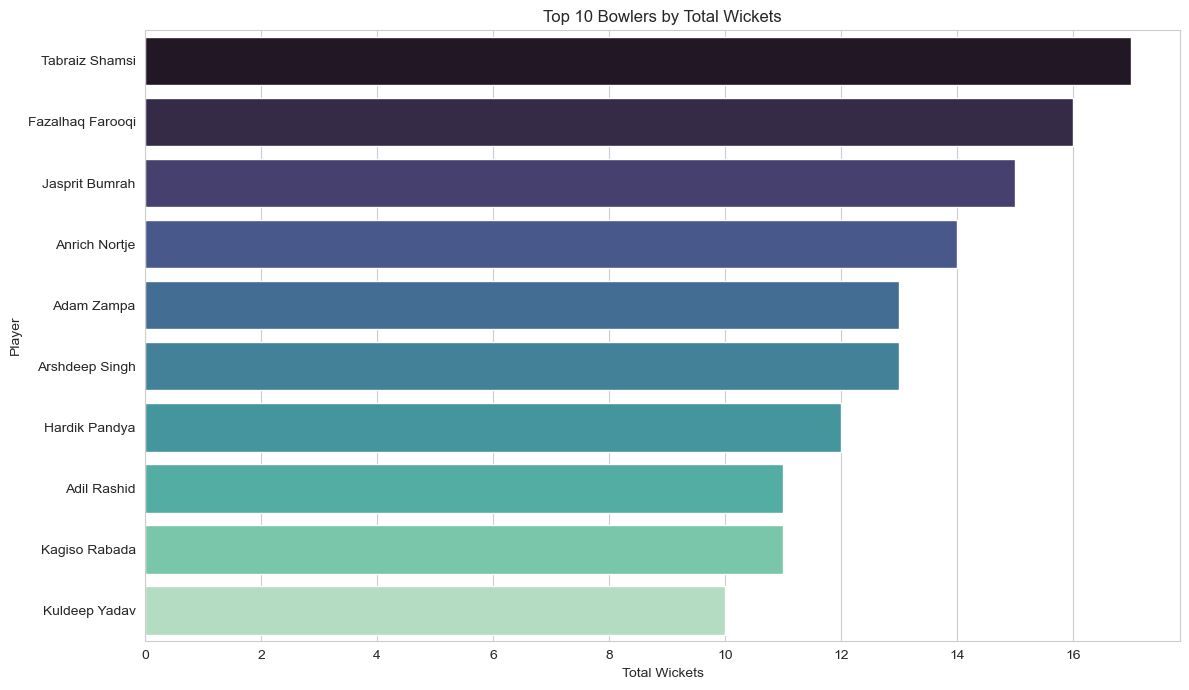


--- Top 5 Players with Most Player of the Match Awards ---
player_of_match
Jasprit Bumrah      3
Tabraiz Shamsi      3
Adam Zampa          2
Fazalhaq Farooqi    2
Gulbadin Naib       2
Name: count, dtype: int64


C:\Users\shres\AppData\Local\Temp\ipykernel_43148\3844402528.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pom_counts.index, y=pom_counts.values, palette='plasma')


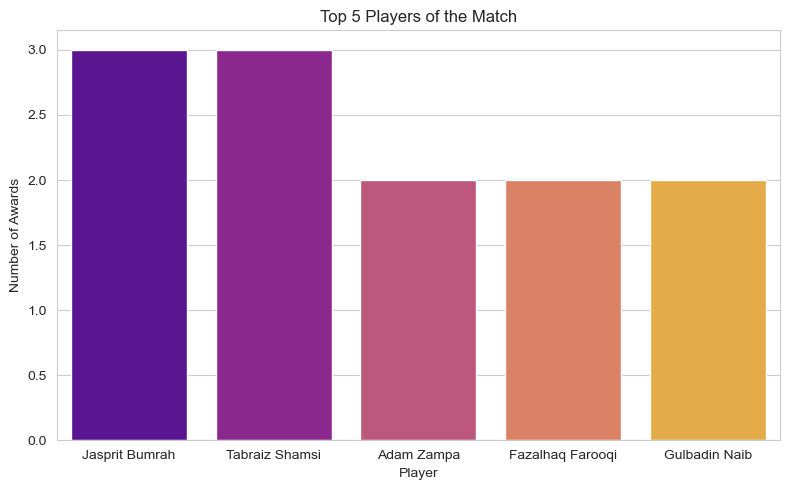


--- Team Wins ---
winner
India           8
South Africa    7
Afghanistan     4
West Indies     4
England         4
Australia       4
Bangladesh      2
USA             2
Namibia         1
Uganda          1
Canada          1
Pakistan        1
Sri Lanka       1
New Zealand     1
Name: count, dtype: int64


C:\Users\shres\AppData\Local\Temp\ipykernel_43148\3844402528.py:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette='cool')


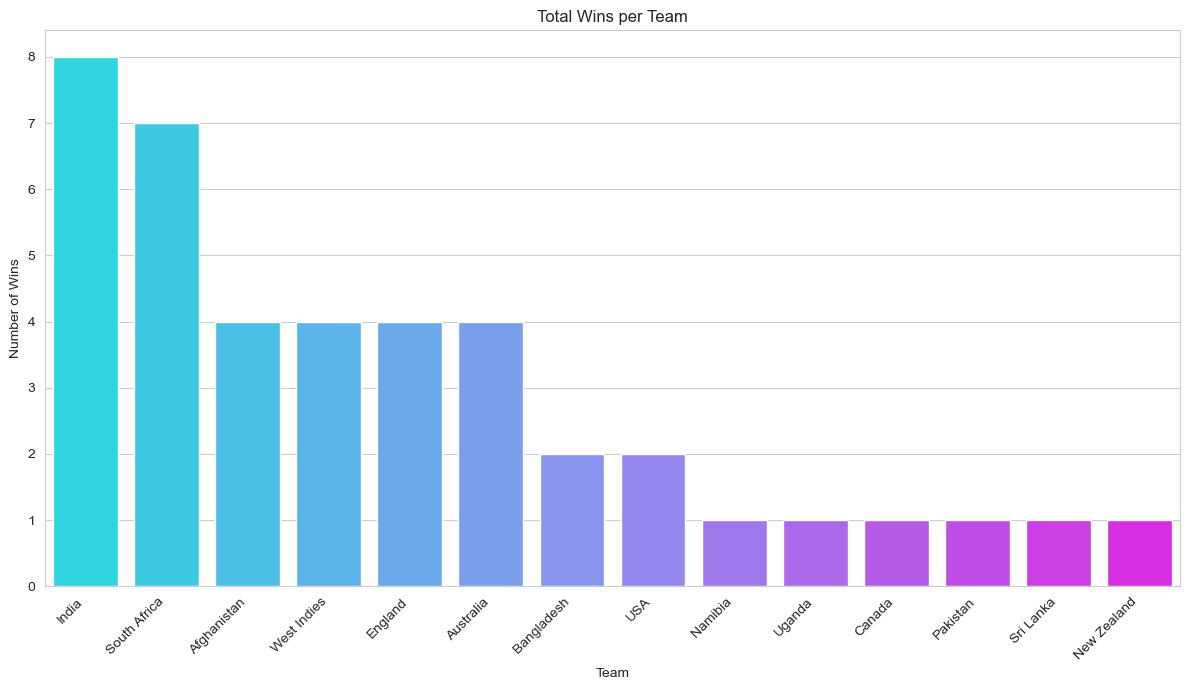

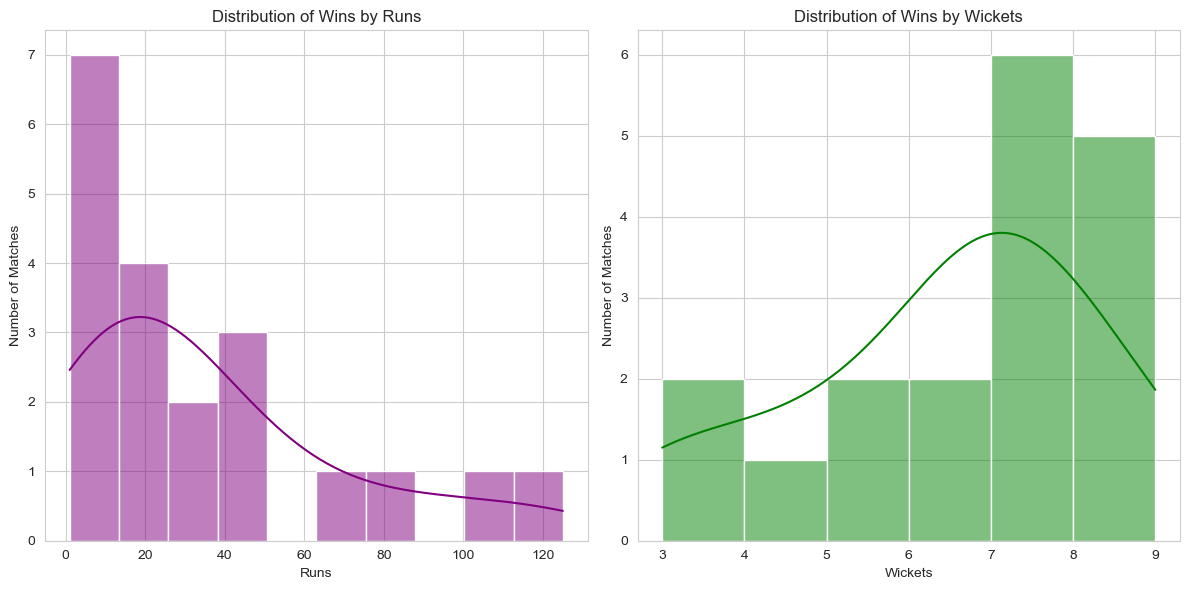

In [11]:
# %% [markdown]
# # T20 World Cup 2024: Exploratory Data Analysis & Key Insights

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the 'src' directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_utils import load_data
from analysis_utils import calculate_toss_advantage, get_top_performers

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100 # For higher resolution plots

# %% [markdown]
# ### Load Cleaned Data

# %%
matches_df = load_data('../data/processed/t20wc_2024_matches_cleaned.csv')
player_stats_df = load_data('../data/processed/t20wc_2024_player_stats_cleaned.csv')

print("Cleaned Matches Data Head:")
print(matches_df.head())
print("\nCleaned Player Stats Data Head:")
print(player_stats_df.head())

# %% [markdown]
# ### 1. Overall Tournament Overview

# %%
total_matches = len(matches_df)
unique_teams = pd.concat([matches_df['team1'], matches_df['team2']]).nunique()
unique_venues = matches_df['venue'].nunique()

print(f"Total Matches Played: {total_matches}")
print(f"Number of Unique Teams: {unique_teams}")
print(f"Number of Unique Venues: {unique_venues}")

# %% [markdown]
# ### 2. Matches Played per Venue

# %%
plt.figure(figsize=(12, 7))
sns.countplot(y='venue', data=matches_df, order=matches_df['venue'].value_counts().index, palette='viridis')
plt.title('Number of Matches Played per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.tight_layout()
plt.savefig('../reports/matches_per_venue.png')
plt.show()

# %% [markdown]
# ### 3. Toss Impact: Does winning the toss matter?

# %%
toss_win_percentage = calculate_toss_advantage(matches_df)
print(f"\nPercentage of matches won by the team that won the toss: {toss_win_percentage:.2f}%")

# Visualize Toss Decision vs. Match Outcome
toss_outcome = matches_df.groupby(['toss_decision', 'winner']).size().unstack(fill_value=0)
toss_outcome_percent = toss_outcome.apply(lambda x: x / x.sum() * 100, axis=1)

print("\nToss Decision vs. Match Outcome (Counts):")
matches_df['toss_winner_won_match'] = matches_df['toss_winner'] == matches_df['winner']
print(matches_df.groupby(['toss_decision', 'toss_winner_won_match']).size().unstack(fill_value=0))

matches_df['toss_winner_won_match'] = matches_df['toss_winner'] == matches_df['winner']

plt.figure(figsize=(8, 5))
sns.countplot(x='toss_decision', hue='toss_winner_won_match', data=matches_df, palette='coolwarm')
plt.title('Toss Decision vs. Toss Winner Winning Match')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(title='Toss Winner Won Match', labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('../reports/toss_impact.png')
plt.show()

# %% [markdown]
# ### 4. Average Scores Analysis

# %%
avg_first_innings = matches_df['first_innings_score'].mean()
avg_second_innings = matches_df['second_innings_score'].mean()

print(f"\nAverage First Innings Score: {avg_first_innings:.2f}")
print(f"Average Second Innings Score: {avg_second_innings:.2f}")

# Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(matches_df['first_innings_score'].dropna(), kde=True, color='skyblue', label='1st Innings')
sns.histplot(matches_df['second_innings_score'].dropna(), kde=True, color='salmon', label='2nd Innings')
plt.title('Distribution of 1st and 2nd Innings Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/innings_score_distribution.png')
plt.show()

# Scores by Venue
plt.figure(figsize=(14, 8))
sns.boxplot(x='venue', y='first_innings_score', data=matches_df, palette='pastel')
plt.title('First Innings Scores by Venue')
plt.xlabel('Venue')
plt.ylabel('First Innings Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../reports/first_innings_scores_by_venue.png')
plt.show()

# %% [markdown]
# ### 5. Top Individual Performers

# %%
# Top Batsmen by Runs
top_batsmen_runs = get_top_performers(player_stats_df, 'runs')
print("\n--- Top 10 Batsmen by Total Runs ---")
print(top_batsmen_runs)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_batsmen_runs.values, y=top_batsmen_runs.index, palette='crest')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig('../reports/top_batsmen_runs.png')
plt.show()

# Top Bowlers by Wickets
top_bowlers_wickets = get_top_performers(player_stats_df, 'wickets')
print("\n--- Top 10 Bowlers by Total Wickets ---")
print(top_bowlers_wickets)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_bowlers_wickets.values, y=top_bowlers_wickets.index, palette='mako')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig('../reports/top_bowlers_wickets.png')
plt.show()

# Top Player of the Match awards
pom_counts = matches_df['player_of_match'].value_counts().nlargest(5)
print("\n--- Top 5 Players with Most Player of the Match Awards ---")
print(pom_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=pom_counts.index, y=pom_counts.values, palette='plasma')
plt.title('Top 5 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.tight_layout()
plt.savefig('../reports/top_pom_players.png')
plt.show()

# %% [markdown]
# ### 6. Team Performance (Wins)

# %%
team_wins = matches_df['winner'].value_counts()
print("\n--- Team Wins ---")
print(team_wins)

plt.figure(figsize=(12, 7))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='cool')
plt.title('Total Wins per Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../reports/team_wins.png')
plt.show()

# %% [markdown]
# ### 7. Win Margin Distribution (Runs vs Wickets)

# %%
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(matches_df[matches_df['win_by_runs'] > 0]['win_by_runs'], kde=True, bins=10, color='purple')
plt.title('Distribution of Wins by Runs')
plt.xlabel('Runs')
plt.ylabel('Number of Matches')

plt.subplot(1, 2, 2)
sns.histplot(matches_df[matches_df['win_by_wickets'] > 0]['win_by_wickets'], kde=True, bins=6, color='green')
plt.title('Distribution of Wins by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Number of Matches')

plt.tight_layout()
plt.savefig('../reports/win_margin_distribution.png')
plt.show()